### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head(10000000)

2. Investigate the dataset for missing or problematic data.

In [ ]:
# Summary statistics
df = pd.DataFrame(data)
print(df.describe(include='all'))

In [ ]:

print("Missing values per column:")
print(df.isnull().sum())

# Check percentage of missing values
print("\nPercentage of missing values:")
print(df.isnull().mean() * 100)

In [ ]:
df.replace("NaN", np.nan, inplace=True)

# Check for missing data
print(df.isnull().sum())

In [ ]:
# Show rows with any missing data
print("\nRows with missing data:")
print(df[df.isnull().any(axis=1)])

In [ ]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...
    
       

In [ ]:
#  1. From the above observations, we can see that car is missing in all the rows and we can drop the car coloumn.
#  2. Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50: Have a small number of missing values so fill them with any way. I am choosing `Unknown`

# Drop the 'car' column
data = data.drop(columns=['car'])

# Fill missing values in categorical columns with 'Unknown'
categorical_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Confirm no missing values remain
missing_values_after_cleaning = data.isnull().sum()

# Display cleaned data summary
missing_values_after_cleaning, data.head()

4. What proportion of the total observations chose to accept the coupon?



In [ ]:
#Calculate the ratio of the number of accepted coupons in the column Y to the total number of observations.
# Calculate the total number of observations
total_observations = len(data)

# Calculate the number of accepted coupons (Y = 1)
accepted_coupons = data['Y'].sum()

# Calculate the proportion
proportion_accepted = accepted_coupons / total_observations

# Display the proportion as a percentage
print(f"Proportion of accepted coupons: {proportion_accepted:.2%}")

In [ ]:
# Calculate acceptance proportions
acceptance_counts = data['Y'].value_counts(normalize=True) * 100
labels = ['Rejected', 'Accepted']  # Assuming 0 = Rejected, 1 = Accepted

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=acceptance_counts.index, y=acceptance_counts.values, palette="coolwarm")
plt.title("Proportion of Coupon Acceptance", fontsize=14)
plt.xlabel("Coupon Acceptance (0 = Rejected, 1 = Accepted)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(ticks=[0, 1], labels=labels)
plt.ylim(0, 100)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

In [ ]:
# Count the occurrences of each coupon type
coupon_counts = data['coupon'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette="viridis", hue=coupon_counts.index, dodge=False, legend=False)
plt.title("Distribution of Coupons", fontsize=16)
plt.xlabel("Coupon Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()


6. Use a histogram to visualize the temperature column.

In [ ]:
# Create the histogram with manually defined colors
plt.figure(figsize=(10, 6))

In [ ]:
# Use matplotlib to customize bar colors
hist_data, bins, patches = plt.hist(df["temperature"], bins=10, edgecolor='black')

# Assign a different color to each bar using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(patches)))  # Color map with vibrant gradient
for bar, color in zip(patches, colors):
    bar.set_facecolor(color)

# Add titles and labels
plt.title("Histogram of Temperature", fontsize=16, color='darkblue')
plt.xlabel("Temperature (F)", fontsize=12, color='darkgreen')
plt.ylabel("Frequency", fontsize=12, color='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability

plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
bar_coupons_df = df[df["coupon"] == "Bar"]

# Display the first few rows to confirm
print(bar_coupons_df.head())

2. What proportion of bar coupons were accepted?


In [ ]:
# Count of accepted bar coupons (Y = 1)
accepted_bar_coupons = bar_coupons_df[bar_coupons_df["Y"] == 1].shape[0]

# Total number of bar coupons
total_bar_coupons = bar_coupons_df.shape[0]

# Proportion of bar coupons accepted
proportion_accepted = accepted_bar_coupons / total_bar_coupons

print(f"Proportion of bar coupons accepted: {proportion_accepted:.2%}")

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Map the "Number of times that he/she goes to a bar" to two groups
bar_coupons_df.loc[:, "bar_visit_group"] = bar_coupons_df["Bar"].map({
    "less1": "less than 1",
    "1~3": "1 to 3",
    "4~8": "4 to 8",
    "gt8": "more than 8"
})

# Calculate the acceptance rate for each group
acceptance_rate = bar_coupons_df.groupby("bar_visit_group")["Y"].mean().round(2)

# Print the results
print(acceptance_rate)

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Replace '50plus' with '50' using .loc
bar_coupons_df.loc[bar_coupons_df['age'] == '50plus', 'Age'] = '51'

# Convert the 'Age' column to numeric values, coercing errors to NaN
bar_coupons_df.loc[:, 'age'] = pd.to_numeric(bar_coupons_df['age'], errors='coerce')

# Drop rows with NaN in 'Age' column (optional based on your handling of missing data)
bar_coupons_df = bar_coupons_df.dropna(subset=['age'])

# Convert 'Age' to integer type
bar_coupons_df.loc[:, 'age'] = bar_coupons_df['age'].astype(int)

# Check the data type again
# print(bar_coupons_df['age'].dtype)
print(bar_coupons_df.head(5))


In [ ]:
# Create a new category for drivers who go to a bar more than once a month and are over the age of 25
bar_and_over_25 = bar_coupons_df[
    (bar_coupons_df['bar_visit_group'].isin(['1 to 3', '4 to 8', 'more than 8'])) & 
    (bar_coupons_df['age'] > 25)
]

# Create a new category for the rest of the drivers
other_drivers = bar_coupons_df[
    ~(bar_coupons_df['bar_visit_group'].isin(['1 to 3', '4 to 8', 'more than 8'])) | 
    (bar_coupons_df['age']) <= 25
]

print(f"bar_and_over_25 = {bar_and_over_25}")
print(f"other_drivers = {other_drivers}")

In [ ]:
# Calculate the acceptance rate for each group
acceptance_rate_bar_and_over_25 = bar_and_over_25["Y"].mean()
acceptance_rate_other_drivers = other_drivers["Y"].mean()

# Round the acceptance rates to 2 decimal places
acceptance_rate_bar_and_over_25_rounded = round(acceptance_rate_bar_and_over_25, 2)
acceptance_rate_other_drivers_rounded = round(acceptance_rate_other_drivers, 2)

# Print the results
print(f"Acceptance rate for bar-goers over 25: {acceptance_rate_bar_and_over_25_rounded}")
print(f"Acceptance rate for others: {acceptance_rate_other_drivers_rounded}")

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
bar_coupons_df.head()

In [ ]:
# Filter drivers who go to bars more than once a month
frequent_bar_goers = bar_coupons_df['bar_visit_group'].isin(['1 to 3', '4 to 8', 'more than 8'])

# Filter for passengers that are not "kid"d"
non_kid_passengers = ~bar_coupons_df['passanger'].str.contains(r'Kid\(s\)', case=False, na=False)

# Filter for occupations other than "Farming, Fishing, and Forestry"
non_farm_fish_forestry = ~bar_coupons_df['occupation'].str.contains('Farming, Fishing and Forestry', case=False, na=False)

# Combine all filters
filtered_drivers = bar_coupons_df[frequent_bar_goers & non_kid_passengers & non_farm_fish_forestry]

# Create a group for all other drivers (negation of the above filters)
other_drivers = bar_coupons_df[~(frequent_bar_goers & non_kid_passengers & non_farm_fish_forestry)]

# Calculate acceptance rates for each group
acceptance_rate_filtered = filtered_drivers["Y"].mean().round(2)
acceptance_rate_other = other_drivers["Y"].mean().round(2)

# Print results
print(f"Acceptance rate for frequent bar-goers with non-kid passengers and other occupations: {acceptance_rate_filtered}")
print(f"Acceptance rate for all other drivers: {acceptance_rate_other}")


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



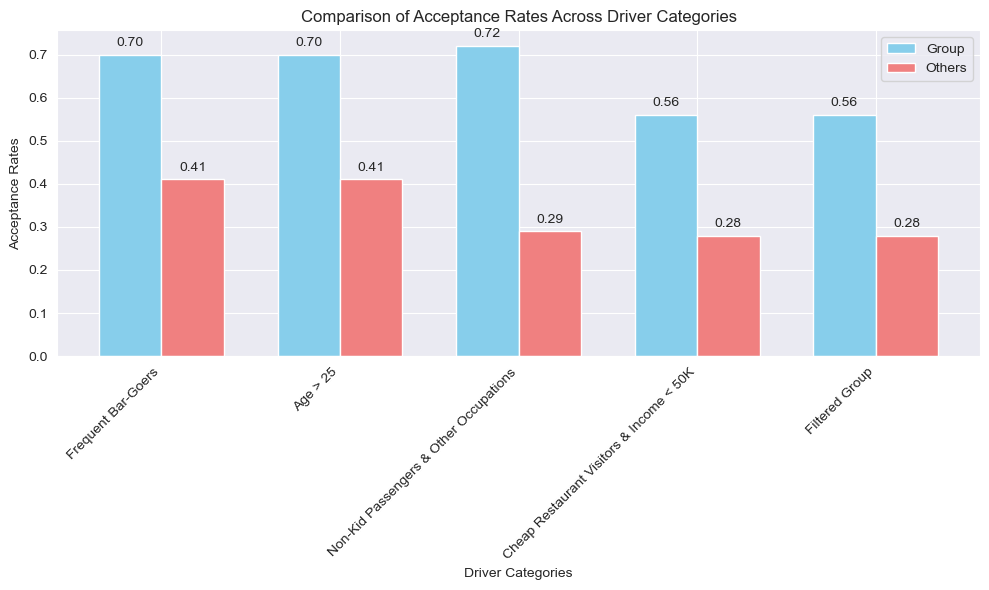

In [200]:
# Data for the visualization
categories = [
    "Frequent Bar-Goers",
    "Age > 25",
    "Non-Kid Passengers & Other Occupations",
    "Cheap Restaurant Visitors & Income < 50K",
    "Filtered Group",
]

acceptance_rates_group = [0.7, 0.7, 0.72, 0.56, 0.56]  # Acceptance rates for the group
acceptance_rates_others = [0.41, 0.41, 0.29, 0.28, 0.28]  # Acceptance rates for others

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, acceptance_rates_group, width, label='Group', color='skyblue')
bars2 = ax.bar(x + width/2, acceptance_rates_others, width, label='Others', color='lightcoral')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Driver Categories')
ax.set_ylabel('Acceptance Rates')
ax.set_title('Comparison of Acceptance Rates Across Driver Categories')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

# Adding value annotations on bars
for bar in bars1:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center', fontsize=10)
for bar in bars2:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{bar.get_height():.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# My observations and hypotheses:
# Frequent Bar Visits: Drivers visiting bars more than once a month are likelier to accept coupons.
# Age Factor: Drivers over 25 years old accept bar coupons at higher rates.
# Passenger Demographics: Non-kid passengers and occupations outside farming, fishing, or forestry correlate with higher acceptance.
# Lifestyle Choices: Frequent visits to cheap restaurants and income under $50K also influence acceptance rates.
# Social/Active Profiles: Socially active and younger drivers tend to accept bar coupons more.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [122]:
print(df["coupon"].unique())

['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


In [123]:
coffeehouse_data = df[df["coupon"] == "Coffee House"]

# Display the first few rows to confirm
print(coffeehouse_data.head())

        destination  passanger weather  temperature  time        coupon  \
1   No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
3   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
4   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
12  No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
15             Home      Alone   Sunny           80   6PM  Coffee House   

   expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
1          2h  Female  21  Unmarried partner  ...        never       NaN   
3          2h  Female  21  Unmarried partner  ...        never       NaN   
4          1d  Female  21  Unmarried partner  ...        never       NaN   
12         2h  Female  21  Unmarried partner  ...        never       NaN   
15         2h  Female  21  Unmarried partner  ...        never       NaN   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
1            

In [129]:
# Acceptance rate for coffeehouse coupon group
acceptance_rate_coffeehouse = coffeehouse_data['Y'].mean()

# Breakdown of coffeehouse coupon acceptance by different groups
# 1. Group by age and calculate acceptance rates
age_groups = coffeehouse_data.groupby('age')['Y'].mean().round(2)

# 2. Group by occupation and calculate acceptance rates
occupation_groups = coffeehouse_data.groupby('occupation')['Y'].mean().round(2)

coffeehouse_data = df[df["coupon"] == "Coffee House"].copy()

# 3. Group by coffeehouse visit frequency (mapping groups such as 'less1', '1~3', etc.)
coffeehouse_data.loc[:, 'visit_group'] = coffeehouse_data['CoffeeHouse'].map({
    'never': 'never',
    'less1': 'less than 1',
    '1~3': '1 to 3',
    '4~8': '4 to 8',
    'gt8': 'more than 8'
})
# 4. Calculate the acceptance rate by coffeehouse visit group
visit_groups = coffeehouse_data.groupby('visit_group')['Y'].mean().round(2)
# Print results for checking
print("\nAcceptance Rate (CoffeeHouse):", acceptance_rate_coffeehouse)
print("\nAcceptance Rate by Age Groups:\n", age_groups)
print("\nAcceptance Rate by Occupation Groups:\n", occupation_groups)
print("\nAcceptance Rate by Visit Groups:\n", visit_groups)


Acceptance Rate (CoffeeHouse): 0.49924924924924924

Acceptance Rate by Age Groups:
 age
21         0.52
26         0.51
31         0.48
36         0.47
41         0.50
46         0.51
50plus     0.42
below21    0.70
Name: Y, dtype: float64

Acceptance Rate by Occupation Groups:
 occupation
Architecture & Engineering                   0.56
Arts Design Entertainment Sports & Media     0.51
Building & Grounds Cleaning & Maintenance    0.73
Business & Financial                         0.48
Community & Social Services                  0.35
Computer & Mathematical                      0.50
Construction & Extraction                    0.48
Education&Training&Library                   0.44
Farming Fishing & Forestry                   0.55
Food Preparation & Serving Related           0.45
Healthcare Practitioners & Technical         0.74
Healthcare Support                           0.62
Installation Maintenance & Repair            0.57
Legal                                        0.38
Life Phy


Acceptance Rate by [1010  985]


/var/folders/2m/d03vnbfn30q13rn2k2xq6gw40000gp/T/ipykernel_33106/4110154812.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2m/d03vnbfn30q13rn2k2xq6gw40000gp/T/ipykernel_33106/4110154812.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


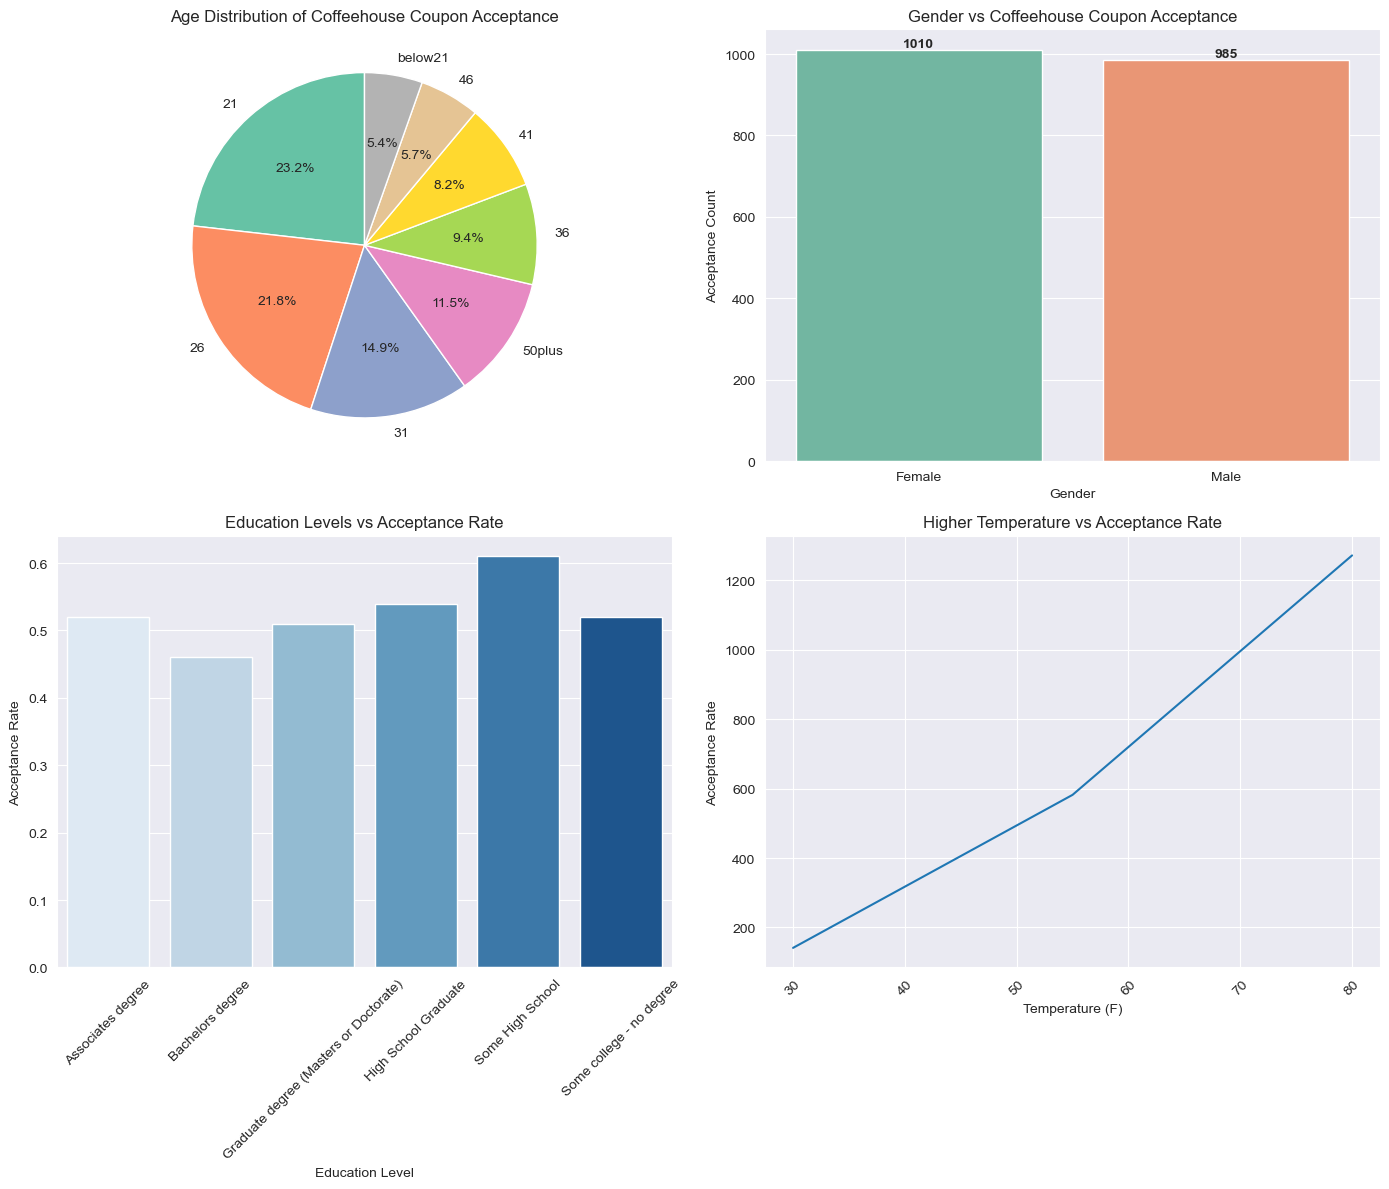

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for passengers who accepted the coffeehouse coupon
accepted_coffeehouse = coffeehouse_data[coffeehouse_data['coupon'] == 'Coffee House']
accepted_coffeehouse = accepted_coffeehouse[accepted_coffeehouse['Y'] == 1]

# Acceptance rate by age group (for pie chart)
age_groups_acceptance = accepted_coffeehouse['age'].value_counts()

# Calculate the count of females and males who accepted the coupon
gender_acceptance_count = accepted_coffeehouse['gender'].value_counts()
print("\nAcceptance Rate by", gender_acceptance_count.values)

# Separate unemployed vs all other occupations
gender_acceptance_data = pd.DataFrame({
    'Gender': gender_acceptance_count.index,
    'Acceptance Count': gender_acceptance_count.values
})

# Group by education and calculate the mean acceptance rate (Y)
education_acceptance_rate = coffeehouse_data.groupby('education')['Y'].mean().round(2)

# Acceptance rate by income (for barplot)
temperature_groups_acceptance = accepted_coffeehouse.groupby('temperature')['Y'].count().round(2)

# Create subplots for visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Pie Chart for Age Distribution
axes[0, 0].pie(age_groups_acceptance, labels=age_groups_acceptance.index, autopct='%1.1f%%', 
               startangle=90, colors=sns.color_palette("Set2", n_colors=len(age_groups_acceptance)))
axes[0, 0].set_title('Age Distribution of Coffeehouse Coupon Acceptance')

# Barplot for Gender vs Acceptance Rate
sns.barplot(
    ax=axes[0, 1],
    x=gender_acceptance_data['Gender'],
    y=gender_acceptance_data['Acceptance Count'],
    palette=sns.color_palette("Set2", n_colors=len(gender_acceptance_data))
)
axes[0, 1].set_title('Gender vs Coffeehouse Coupon Acceptance')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Acceptance Count')

# Display count on top of bars
for i, value in enumerate(gender_acceptance_data['Acceptance Count']):
    axes[0, 1].text(i, value + 0.1, str(value), ha='center', va='bottom', fontweight='bold')
    
# Barplot for Education vs Acceptance Rate
sns.barplot(ax=axes[1, 0], x=education_acceptance_rate.index, y=education_acceptance_rate.values, hue=education_acceptance_rate.index , 
            palette=sns.color_palette("Blues", n_colors=len(education_acceptance_rate)))
axes[1, 0].set_title('Education Levels vs Acceptance Rate')
axes[1, 0].set_xlabel('Education Level')
axes[1, 0].set_ylabel('Acceptance Rate')
axes[1, 0].set_xticks(range(len(education_acceptance_rate)))
axes[1, 0].set_xticklabels(education_acceptance_rate.index, rotation=45)

# Barplot for Temperature vs Acceptance Rate
sns.lineplot(
    ax=axes[1, 1],
    x=temperature_groups_acceptance.index,
    y=temperature_groups_acceptance.values
)
axes[1, 1].set_title('Higher Temperature vs Acceptance Rate')
axes[1, 1].set_xlabel('Temperature (F)')
axes[1, 1].set_ylabel('Acceptance Rate')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
#Here are some key insights and notable trends from the visualizations:

#Age Group Distribution:
#Age group between 21-26 shows a higher acceptance rate for the coffeehouse coupon, indicating that younger or middle-aged individuals may be more inclined to accept promotional offers.

#Gender Acceptance Count:
#The count of females who accepted the coupon is slightly higher than males. This suggests that women may be more responsive to such promotions or may have higher engagement with coffeehouse offers.

#Temperature vs Acceptance Rate:
Th#ere is a potential positive correlation between temperature and the acceptance rate, where warmer temperatures >60F might encourage more individuals to visit the coffeehouse, perhaps for a refreshing drink or a break.

#Education Level and Acceptance Rate:
#Individuals with higher education levels tend to have a higher acceptance rate for the coupon. This could indicate that more educated individuals are more likely to engage with promotional campaigns.

# Summary:
# Younger individuals, females, and those with higher education levels are more likely to accept the coffeehouse coupon.
# Temperature might influence coupon acceptance, with warmer weather promoting higher engagement.

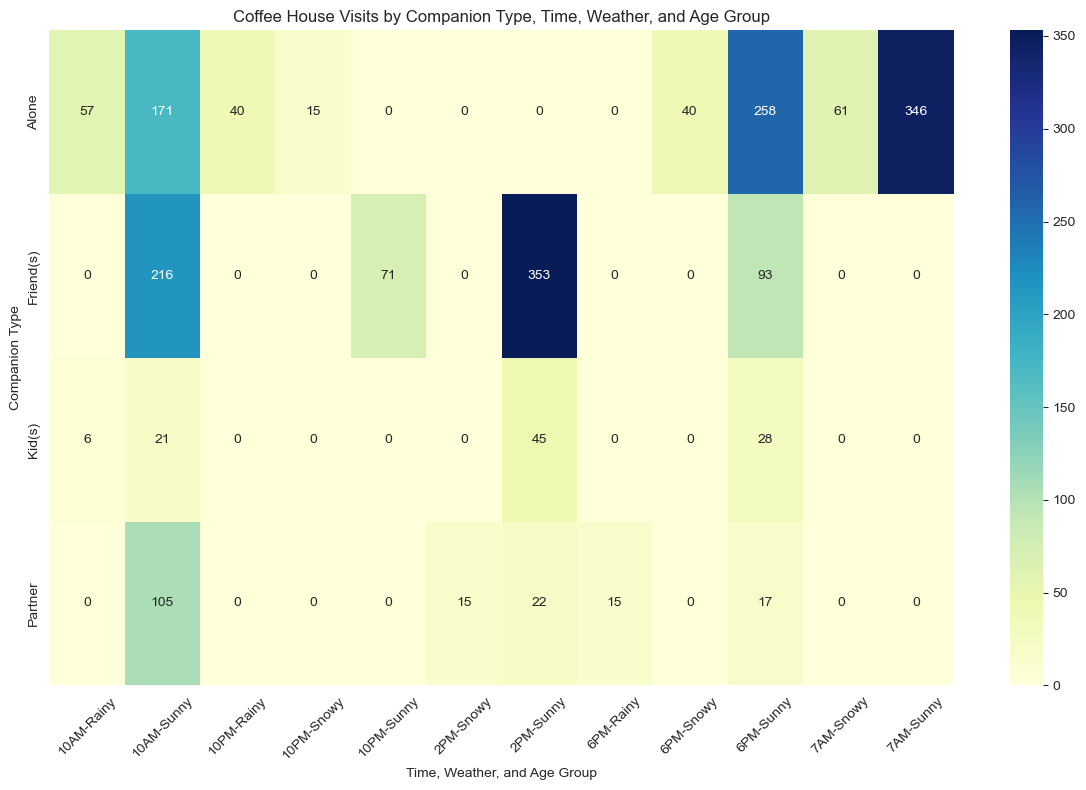

In [199]:
#Another visualization for the comparision of multiples fields along side with Coffee House and Accepting Coupons
# Group data by 'companions' (or the relevant column indicating "Alone", "Friends", etc.)
companions_counts = accepted_coffeehouse['passanger'].value_counts()

# Create a DataFrame for visualization of companion types
companions_df = pd.DataFrame({
    'Companion Type': companions_counts.index,
    'Count': companions_counts.values
})

# Create a pivot table with more columns like time, weather, and other relevant columns
heatmap_data = accepted_coffeehouse.pivot_table(
    index='passanger',  # Companion type
    columns=['time', 'weather'],  # Additional columns to segment the data
    aggfunc='size',  # Count the occurrences
    fill_value=0
)

# Heatmap for visualizing the data
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Coffee House Visits by Companion Type, Time, Weather, and Age Group')
plt.xlabel('Time, Weather, and Age Group')
plt.ylabel('Companion Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [ ]:
## Key Observations:
#   Friends have the highest visits, especially at 10AM on sunny days.
#   Alone and Partner visits are less frequent, with Kids visiting the least.
#   Sunny weather increases visits, especially at 10AM and 2PM, while rainy or snowy weather reduces visits.
#   Morning and afternoon (mainly 10AM Sunny) are the most active times.
# 
## Insights:
#   Sunny, 10AM is the peak time for coffeehouse visits, especially with friends.
#   Rainy/snowy weather and early mornings show lower visit rates.
## Actionable Takeaways:
#   Focus coffeehouse promotions during 10AM on sunny days.
#   Target friend groups as the primary demographic for coupons.